In [2]:
import os
os.environ['PATH'] = '/Library/TeX/texbin:' + os.environ['PATH']
print(os.environ['PATH'])
# this is to get the save as pdf to work but it's still not working

/Library/TeX/texbin:/Users/sheilamcgovern/anaconda3/bin:/Users/sheilamcgovern/anaconda3/condabin:/opt/homebrew/opt/node@20/bin:/opt/homebrew/opt/node@16/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin


In [3]:
# Data Wrangling
## Checking for missing values

In [4]:
import pandas as pd
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
print(df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [5]:
## The dataset has 7560 entries with 6 columns and no missing values.  Since there are no missing values, and I can see that the sales dollars ('Sales') and the unit quanties ('Unit') columns are datatype "int64" they are numeric and ready for calculations.<br> (I can move on to next step.

In [6]:
## Normalization

In [7]:
### This will ensure that the values are in a consistent range for later comparisons.  First find the max and mins for the numeric data and add a new colun with that data.

In [8]:
sales_min = df['Sales'].min()
sales_max = df['Sales'].max()
df['Sales_normalized'] = (df['Sales'] - sales_min) / (sales_max - sales_min)
unit_min = df['Unit'].min()
unit_max = df['Unit'].max()
df['Unit_normalized'] = (df['Unit'] - unit_min) / (unit_max - unit_min)
print(df[['Sales', 'Sales_normalized', 'Unit', 'Unit_normalized']].head()) # test to see if that worked properly to see the original data next to the normalized data                        
                         

   Sales  Sales_normalized  Unit  Unit_normalized
0  20000          0.095238     8         0.095238
1  20000          0.095238     8         0.095238
2  10000          0.031746     4         0.031746
3  37500          0.206349    15         0.206349
4   7500          0.015873     3         0.015873


In [9]:
# Data Analysis

In [10]:
## Understand the distribution of the sales and unit data as they pertain to other factors such as location and demographics to see which categories are perfoming best and worst 

In [11]:
df.describe()

,Unit,Sales,Sales_normalized,Unit_normalized
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


In [12]:
state_sales = df.groupby('State')['Sales'].sum()
print(state_sales)

State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64


In [13]:
## Output above shows that VIC clearly stands out as the best state for sales, followed by NSW that is doing 75% as well.  WA, TAS, and NT are lagging in comparison.

In [14]:
## Weekly, Monthly and Quarterly Reports

In [15]:
### Since the .info() output shows that the date is an object and not in datetime, I need to convert it.

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head(10))

        Date        Time State     Group  Unit  Sales  Sales_normalized  \
0 2020-10-01     Morning    WA      Kids     8  20000          0.095238   
1 2020-10-01     Morning    WA       Men     8  20000          0.095238   
2 2020-10-01     Morning    WA     Women     4  10000          0.031746   
3 2020-10-01     Morning    WA   Seniors    15  37500          0.206349   
4 2020-10-01   Afternoon    WA      Kids     3   7500          0.015873   
5 2020-10-01   Afternoon    WA       Men    10  25000          0.126984   
6 2020-10-01   Afternoon    WA     Women     3   7500          0.015873   
7 2020-10-01   Afternoon    WA   Seniors    11  27500          0.142857   
8 2020-10-01     Evening    WA      Kids    15  37500          0.206349   
9 2020-10-01     Evening    WA       Men    15  37500          0.206349   

   Unit_normalized  
0         0.095238  
1         0.095238  
2         0.031746  
3         0.206349  
4         0.015873  
5         0.126984  
6         0.015873  
7     

In [17]:
### pandas documentation shows a few ways to generate the sales reports.<br>  This is the pd.Grouper which requires passing parameters for the key being the column name and the frequency W, M or Q then referencing the column, in this case Sales and getting the sum 

In [18]:
weekly_sales = df.groupby(pd.Grouper(key='Date', freq='W'))['Sales'].sum()
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Sales'].sum()
quarterly_sales = df.groupby(pd.Grouper(key='Date', freq='QE'))['Sales'].sum()
print("Weekly Sales:")
print(weekly_sales)
print("Monthly Sales:")
print(monthly_sales)
print("Quarterly Sales:")
print(quarterly_sales)

Weekly Sales:
Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64
Monthly Sales:
Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64
Quarterly Sales:
Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64


In [19]:
# Data Visualization

In [20]:
## State-wise

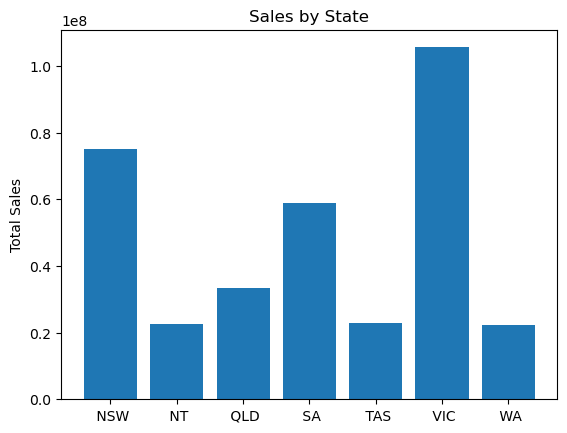

In [21]:
import matplotlib.pyplot as plt

# group sales by state and total them, converts the index back into a regular column with default integers index
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# take the state names and total the sales
states = state_sales['State']
sales_totals = state_sales['Sales']

# defining the color for each bar to be blue
bar_colors = ['tab:blue'] * len(states)

# create the bar chart
fig, ax = plt.subplots()
ax.bar(states, sales_totals, color=bar_colors)

# create the chart labels
ax.set_ylabel('Total Sales')
ax.set_title('Sales by State')
# legend is not necessary because all the bars are the same color

plt.show()


In [22]:
## Group-wise (Demographic)

In [23]:
demo_sales = df.groupby('Group')['Sales'].sum() # creates the report for sales by group
print(demo_sales)

Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64


In [24]:
## this report shows that there is not significant difference between the different age groups

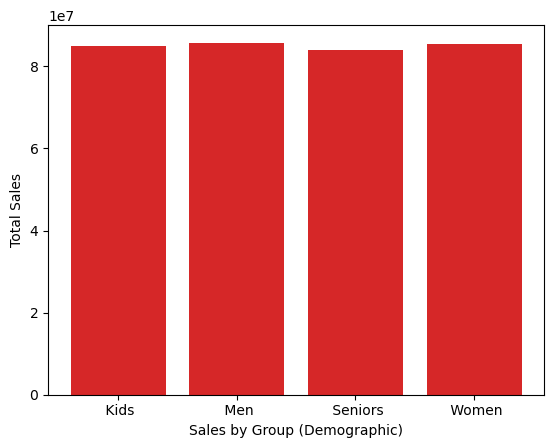

In [25]:
# get all the sales and group them by group and total them then reset the index
demo_sales = df.groupby('Group')['Sales'].sum().reset_index()

# define groups as the sales per group
groups = demo_sales['Group']
group_totals = demo_sales['Sales']

# let all the bar colors be yellow
bar_colors = ['tab:red'] * len(groups)

# create the bar chart
fig, ax = plt.subplots()
ax.bar(groups, group_totals, color=bar_colors)

# create the labels
ax.set_ylabel('Total Sales')
ax.set_xlabel('Sales by Group (Demographic)')

plt.show()


In [26]:
# now that there is quite a variance in sales per state yet the sales per group are somewhat constant, let's look at the sales by group in each state

In [27]:
sales_by_state_group = df.groupby(['State', 'Group'])['Sales'].sum().unstack()
print(sales_by_state_group)

Group      Kids       Men   Seniors     Women
State                                        
NSW    18587500  19022500  18187500  19172500
NT      5700000   5762500   5465000   5652500
QLD     8510000   8392500   8190000   8325000
SA     14515000  14655000  14717500  14970000
TAS     5775000   5757500   5650000   5577500
VIC    26360000  26407500  26315000  26482500
WA      5625000   5752500   5512500   5262500


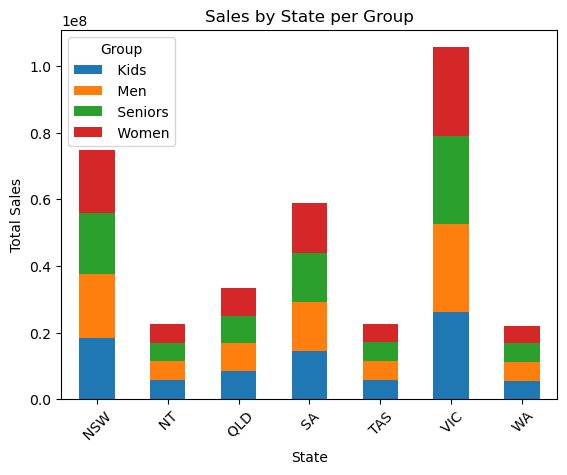

In [28]:
sales_by_state_group.plot(kind='bar', stacked=True)
plt.ylabel('Total Sales')
plt.title('Sales by State per Group')
plt.xticks(rotation=45)  # For better readability if there are many states
plt.show()

In [29]:
# this look pretty consistent, so let's look at sales by state by group

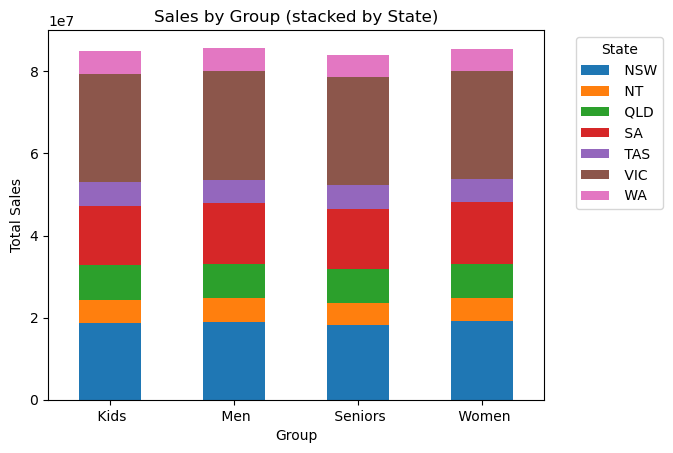

In [30]:
import matplotlib.pyplot as plt

# Group by 'Group' and 'State', then sum Sales and unstack to pivot data.
sales_by_group_state = df.groupby(['Group', 'State'])['Sales'].sum().unstack()

# Create the stacked bar chart
sales_by_group_state.plot(kind='bar', stacked=True)

plt.ylabel('Total Sales')
plt.title('Sales by Group (stacked by State)')
plt.xticks(rotation=0)  # Adjust rotation if needed for readability
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # optional: place legend outside

plt.show()


In [31]:
# this is also quite consistently showing that the major difference in sales as to do with the state and not any of the groups

In [32]:
# Using the normalized data to make some comparisons

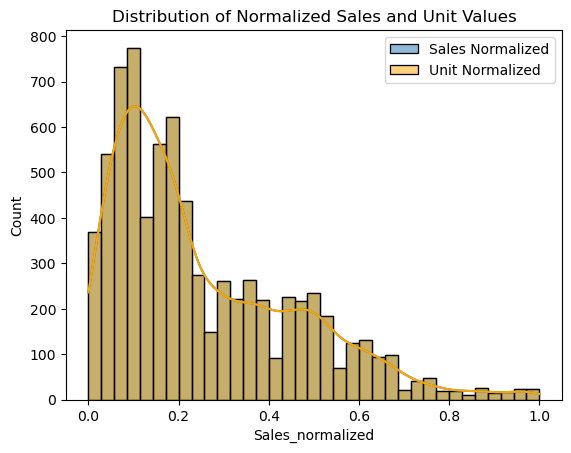

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Sales_normalized'], kde=True, label='Sales Normalized')
sns.histplot(df['Unit_normalized'], kde=True, label='Unit Normalized', color='orange')
plt.legend()
plt.title('Distribution of Normalized Sales and Unit Values')
plt.show()


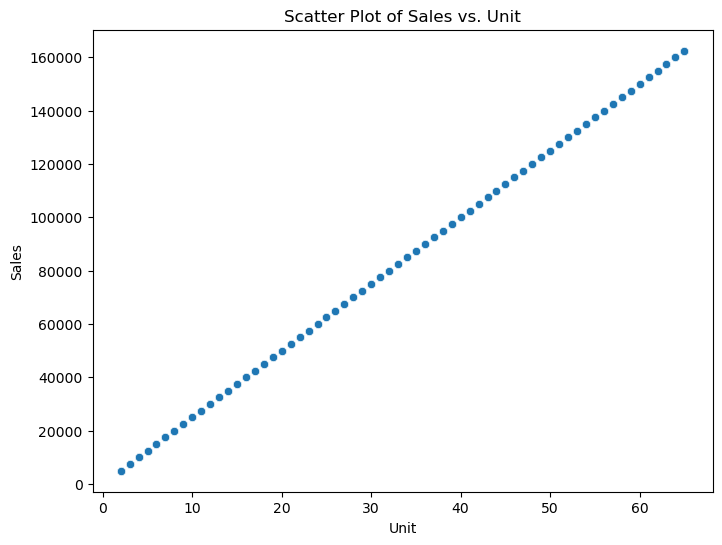

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='Unit', y='Sales', data=df)
plt.title("Scatter Plot of Sales vs. Unit")
plt.xlabel("Unit")
plt.ylabel("Sales")
plt.show()


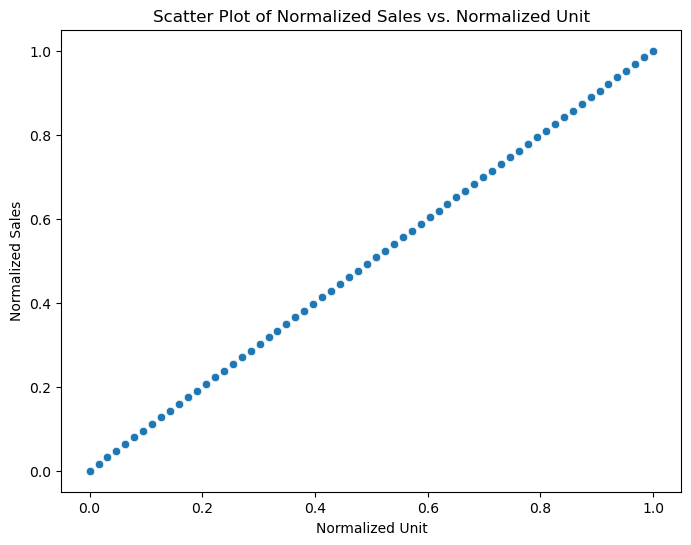

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Unit_normalized', y='Sales_normalized', data=df)
plt.title("Scatter Plot of Normalized Sales vs. Normalized Unit")
plt.xlabel("Normalized Unit")
plt.ylabel("Normalized Sales")
plt.show()


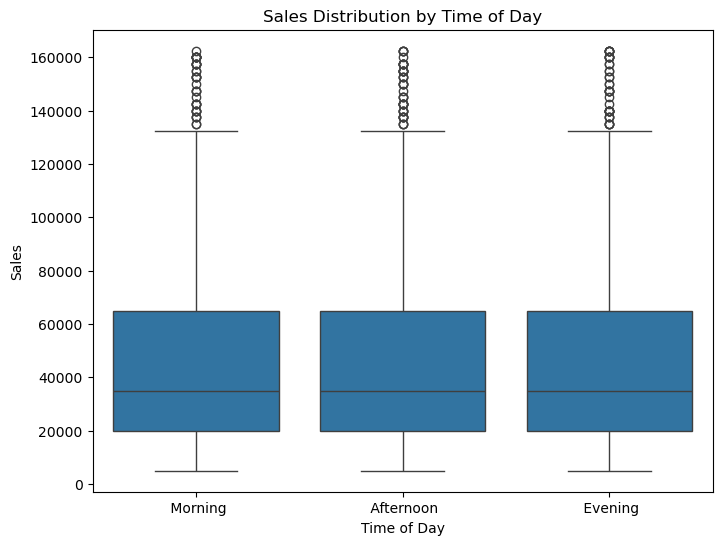

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Time', y='Sales', data=df)
plt.title("Sales Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Sales")
plt.show()


In [37]:
import os
print(os.environ['PATH'])


/Library/TeX/texbin:/Users/sheilamcgovern/anaconda3/bin:/Users/sheilamcgovern/anaconda3/condabin:/opt/homebrew/opt/node@20/bin:/opt/homebrew/opt/node@16/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin


In [38]:
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()
print(state_group_sales)


Group      Kids       Men   Seniors     Women
State                                        
NSW    18587500  19022500  18187500  19172500
NT      5700000   5762500   5465000   5652500
QLD     8510000   8392500   8190000   8325000
SA     14515000  14655000  14717500  14970000
TAS     5775000   5757500   5650000   5577500
VIC    26360000  26407500  26315000  26482500
WA      5625000   5752500   5512500   5262500


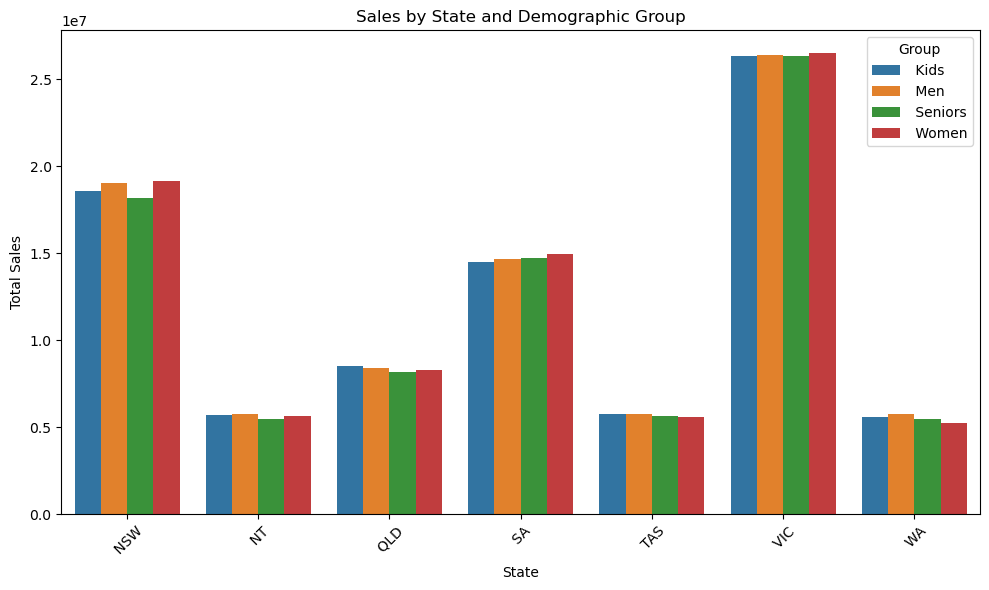

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame 'df' with columns: State, Group, Sales
# First, group the data and sum sales by State and Group, then reset the index:
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Create a grouped bar chart:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Sales', hue='Group', data=state_group_sales)
plt.title('Sales by State and Demographic Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate state labels for readability
plt.legend(title='Group')
plt.tight_layout()
plt.show()


In [40]:
# there seems to be no trend for sales as it relates to groups.  they are fairly consistent.  so maybe we should look at the average price per unit

In [43]:
state_sales_units = df.groupby('State').agg({'Sales': 'sum', 'Unit': 'sum'})
state_avg_price = state_sales_units['Sales'] / state_sales_units['Unit']
print(state_avg_price)



State
NSW    2500.0
NT     2500.0
QLD    2500.0
SA     2500.0
TAS    2500.0
VIC    2500.0
WA     2500.0
dtype: float64


In [44]:
# so there is no trend here.  AAL sells all units for the same price, regardless of state.  I was hoping to find that pticing was an issue and perhaps the prices were too high in the states with low revenue.  But that is not the case

In [ ]:
# is there any trend for time of day for sales per state

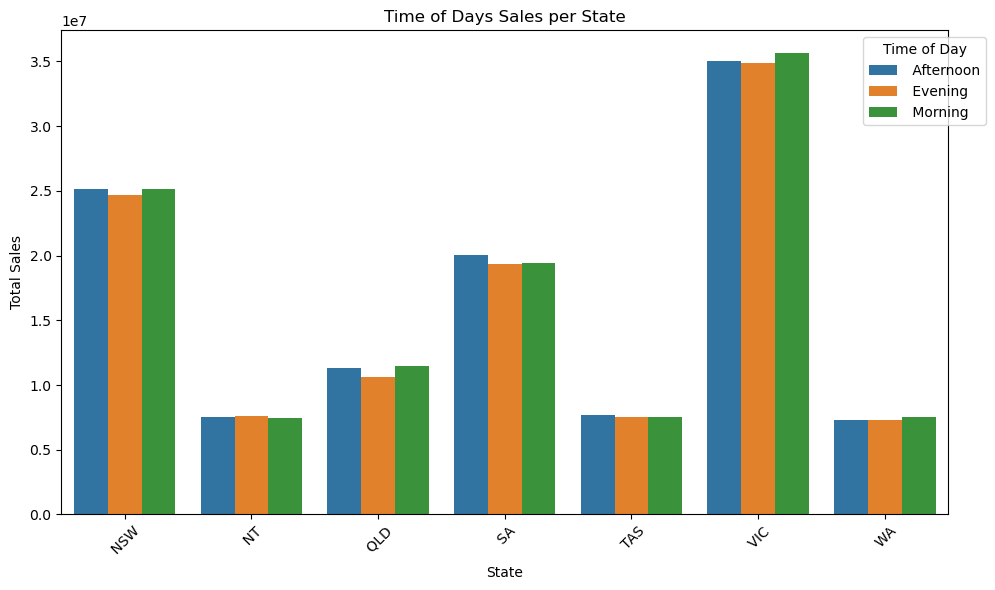

In [47]:
time_state_sales = df.groupby(['State', 'Time'])['Sales'].sum().reset_index()

# create bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Sales', hue='Time', data=time_state_sales)
plt.title('Time of Days Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [48]:
# there are no appreciable insights here.  There is a slight amount more sales in the higher sales states in the morning but not enough to make a recommendation.

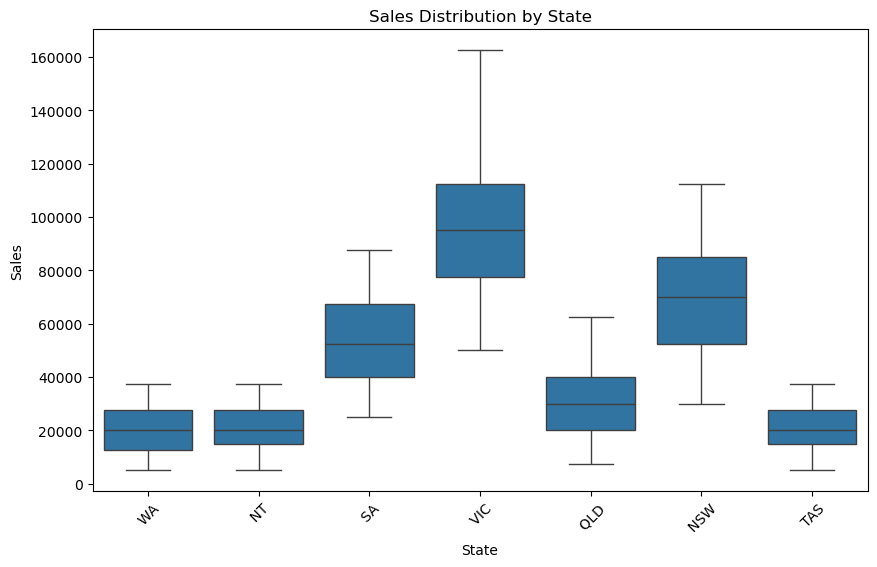

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='State', y='Sales', data=df)
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


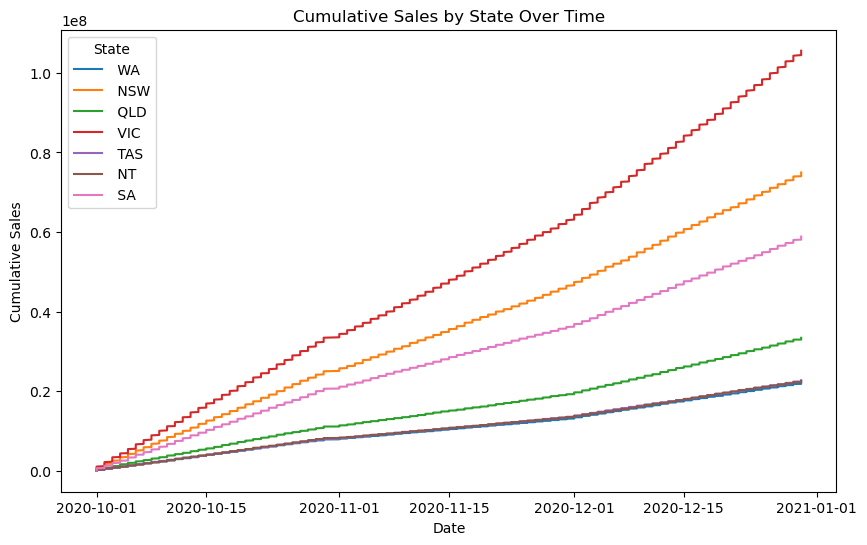

In [50]:
df_sorted = df.sort_values('Date')
df_sorted['Cumulative_Sales'] = df_sorted.groupby('State')['Sales'].cumsum()

plt.figure(figsize=(10,6))
for state in df_sorted['State'].unique():
    state_data = df_sorted[df_sorted['State'] == state]
    plt.plot(state_data['Date'], state_data['Cumulative_Sales'], label=state)
plt.title('Cumulative Sales by State Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.legend(title='State')
plt.show()


In [51]:
# there is a slighter more steep increase over the third and fourth quarters for the higher sales states but overall all the states ae consistent

In [52]:
# There is no data given to analyze how many sales people are working or the locations of the stores in the different states or even how many stores are in each state.  No consideration is given to the profitablility.  Even though some states have higher sales does not mean they are more profitable.  Perhaps more or less salespeople are required.  Perhaps the location should be in a mall and not in a stand alone location.  But we have none of this data to analyze.  Therefore the recommendation is to gather more information on direct costs, operating costs, whether salespeople are effective, the type of locations of the stores and other demographics about the states in general to garner some sort of analysis of the opportunity for sales in each state.